In [1]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


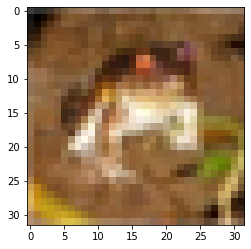

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
from tensorflow.keras.utils import to_categorical
y_train_c =to_categorical(y_train,10)
y_test_c =to_categorical(y_test,10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input,AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                             rotation_range=20,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             horizontal_flip=True,
                            )

In [8]:
train_gen = datagen.flow(x_train,y_train_c)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_path = 'CNN_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
history=model.fit(train_gen,epochs=10,validation_data=(x_test,y_test_c),callbacks=callbacks_list)

Epoch 1/10
1563/1563 [==============================] - 63s 19ms/step - loss: 2.0416 - accuracy: 0.3272 - val_loss: 1.3136 - val_accuracy: 0.5272

Epoch 00001: val_accuracy improved from -inf to 0.52720, saving model to CNN_model.h5
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3118 - accuracy: 0.5324 - val_loss: 1.1555 - val_accuracy: 0.6061

Epoch 00002: val_accuracy improved from 0.52720 to 0.60610, saving model to CNN_model.h5
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1211 - accuracy: 0.6080 - val_loss: 0.9376 - val_accuracy: 0.6674

Epoch 00003: val_accuracy improved from 0.60610 to 0.66740, saving model to CNN_model.h5
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0023 - accuracy: 0.6547 - val_loss: 0.7905 - val_accuracy: 0.7308

Epoch 00004: val_accuracy improved from 0.66740 to 0.73080, saving model to CNN_model.h5
Epoch 5/10
1563/1563 [==============================] - 29s

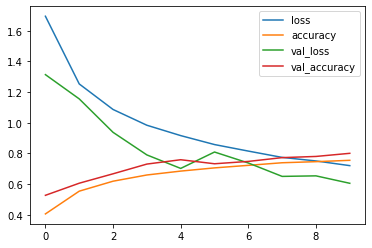

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [13]:
model_path = 'CIFAR10.h5'
model.save(model_path)

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred

array([[8.6598480e-03, 1.8934675e-02, 1.4153929e-02, ..., 2.4743653e-03,
        6.8972766e-02, 2.2751398e-02],
       [3.0516670e-04, 3.7233192e-01, 1.2088174e-06, ..., 6.1916502e-08,
        6.2650281e-01, 8.5554982e-04],
       [9.1183148e-03, 7.0212625e-02, 1.2039723e-04, ..., 7.9483079e-06,
        9.1874301e-01, 1.6979969e-03],
       ...,
       [1.4157445e-05, 1.7354585e-05, 3.4817564e-03, ..., 5.4280893e-03,
        4.8939022e-05, 2.1127156e-04],
       [1.3358810e-02, 9.7617269e-01, 7.1176561e-04, ..., 4.3518946e-04,
        1.3775768e-03, 4.1710008e-03],
       [1.3262919e-05, 7.0981132e-06, 1.4955190e-04, ..., 9.9657923e-01,
        6.9517313e-07, 5.3450358e-06]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [24]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [25]:
x = classes[y_pred[2]]

In [26]:
x

'Ship'

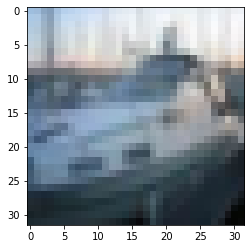

In [23]:
plt.imshow(x_test[2])

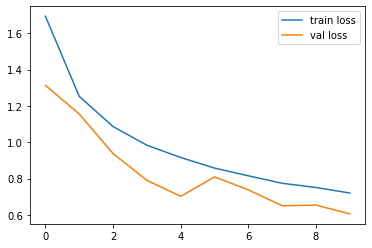

In [28]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

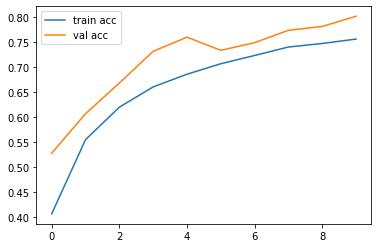

In [29]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()